# 接种疫苗的排队规律

为什么接种疫苗的速度明明很快，为什么队伍总是那么长呢？

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [276]:
in_eff = 10
size = 10000

In [307]:
def f(in_eff, out_eff, var):
    in_num = np.maximum(0, np.random.normal(in_eff, var, size))
    out_num = np.maximum(0, np.random.normal(out_eff, var, size))

    # in_num = np.random.poisson(in_eff, size)
    # out_num = np.random.poisson(out_eff, size)

    queue = np.zeros(len(in_num) + 1)
    for i in range(1, len(queue)):
        queue[i] = max(0, queue[i - 1] + in_num[i - 1] - out_num[i - 1])

    queue = queue[1:]
    t_mean, t_var = np.mean(queue), np.var(queue)
    
    plt.plot(queue)
    plt.title(f'in_eff: {in_eff}, out_eff: {out_eff}, var: {var}')
    plt.show()
    print(f't_mean: {t_mean}, t_var: {t_var}')

可以看到处理效率只要比接收效率慢10%，就差异累积、大排长龙；处理效率比接收效率快10%就几乎没什么人排队；当处理效率和接收效率一致时比较随机：

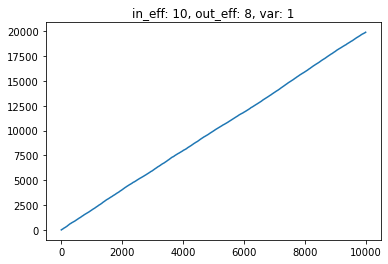

t_mean: 9962.651492100917, t_var: 32853607.917560212


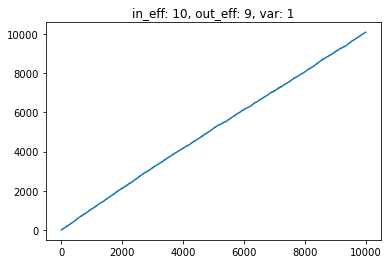

t_mean: 5118.5939738605875, t_var: 8344448.494721081


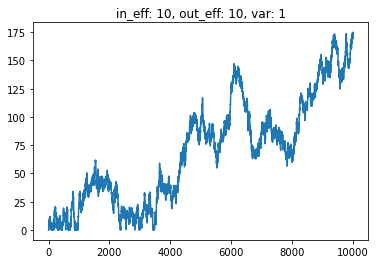

t_mean: 69.150788867354, t_var: 2202.3295801944555


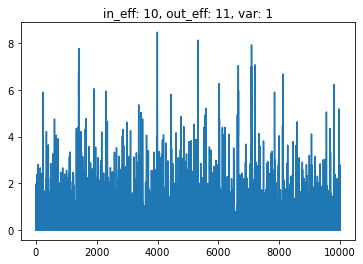

t_mean: 0.43434971777434656, t_var: 0.8925590597777313


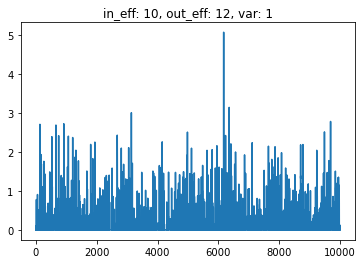

t_mean: 0.062000876605581824, t_var: 0.07203901855309558


In [308]:
for out_eff in range(in_eff - 2, in_eff + 3):
    f(in_eff, out_eff, 1)

处理效率与接收效率均值固定时，其方差（人群到达速度和医生接种效率的随机性）越大，排队越长：

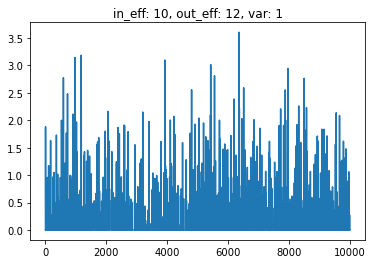

t_mean: 0.06026552063094657, t_var: 0.06926859314820463


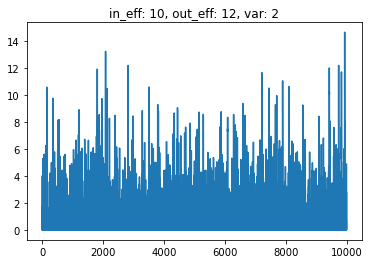

t_mean: 0.7667951011762743, t_var: 2.573696600001469


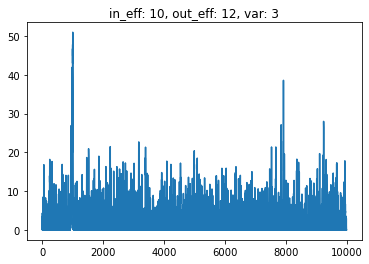

t_mean: 2.4743424106254417, t_var: 19.62673743100751


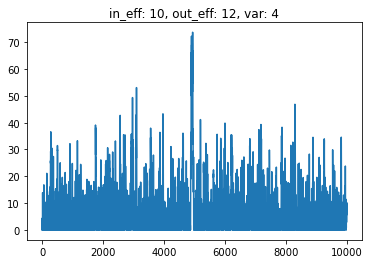

t_mean: 6.0809814116794545, t_var: 79.2049242025348


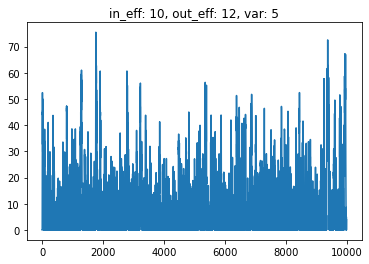

t_mean: 8.855558175345786, t_var: 139.6507651270244


In [310]:
for var in range(1, 6):
    f(in_eff, in_eff + 2, var)